<a href="https://colab.research.google.com/github/TyaraKusumaNevada/PCVK_Genap_2025/blob/main/Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


Langkah 2 Membuat Histogram Citra Manual

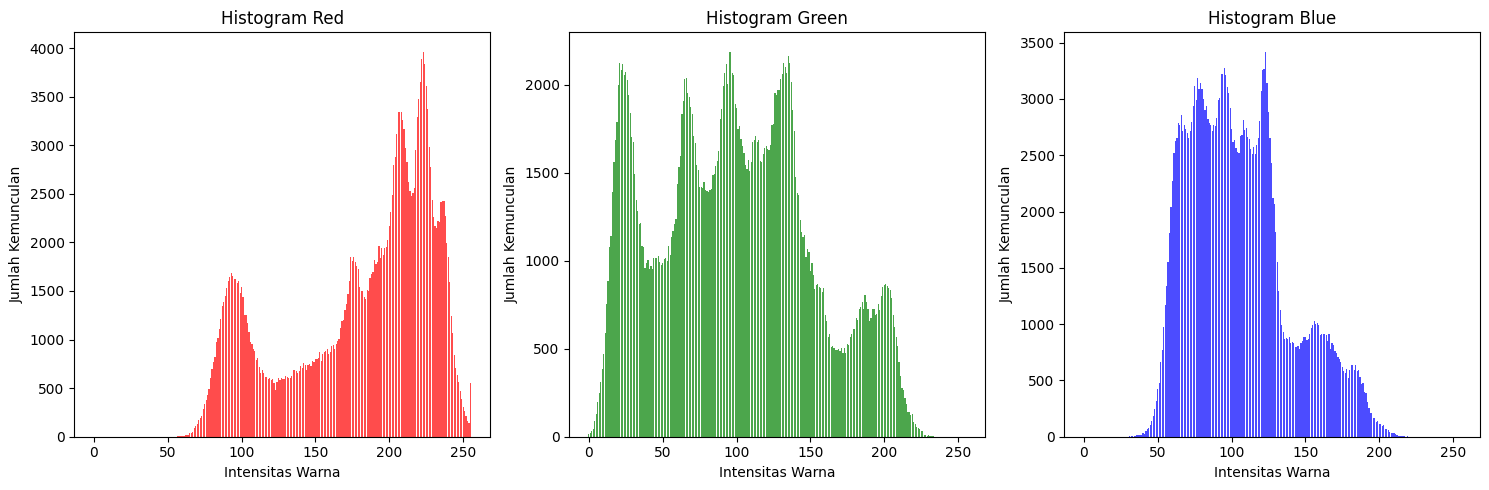

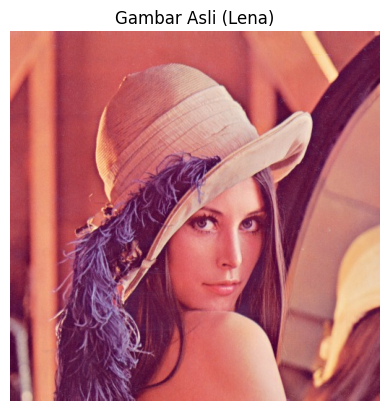

In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

# Membaca gambar lena.jpg
img = cv.imread('/content/lena.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Konversi BGR ke RGB

# Inisialisasi array untuk menyimpan jumlah kemunculan setiap intensitas (0-255) untuk setiap channel
hist_r = [0] * 256
hist_g = [0] * 256
hist_b = [0] * 256

# Loop melalui setiap pixel
for i in range(img_rgb.shape[0]):
    for j in range(img_rgb.shape[1]):
        r, g, b = img_rgb[i, j]
        hist_r[r] += 1
        hist_g[g] += 1
        hist_b[b] += 1

# Plot histogram untuk masing-masing channel R, G, B
plt.figure(figsize=(15, 5))

# Channel Red
plt.subplot(1, 3, 1)
plt.bar(range(256), hist_r, color='red', alpha=0.7)
plt.title('Histogram Red')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

# Channel Green
plt.subplot(1, 3, 2)
plt.bar(range(256), hist_g, color='green', alpha=0.7)
plt.title('Histogram Green')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

# Channel Blue
plt.subplot(1, 3, 3)
plt.bar(range(256), hist_b, color='blue', alpha=0.7)
plt.title('Histogram Blue')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.tight_layout()
plt.show()

# Tampilkan gambar asli
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Gambar Asli (Lena)')
plt.show()

Langkah 3 — Histogram Menggunakan NumPy

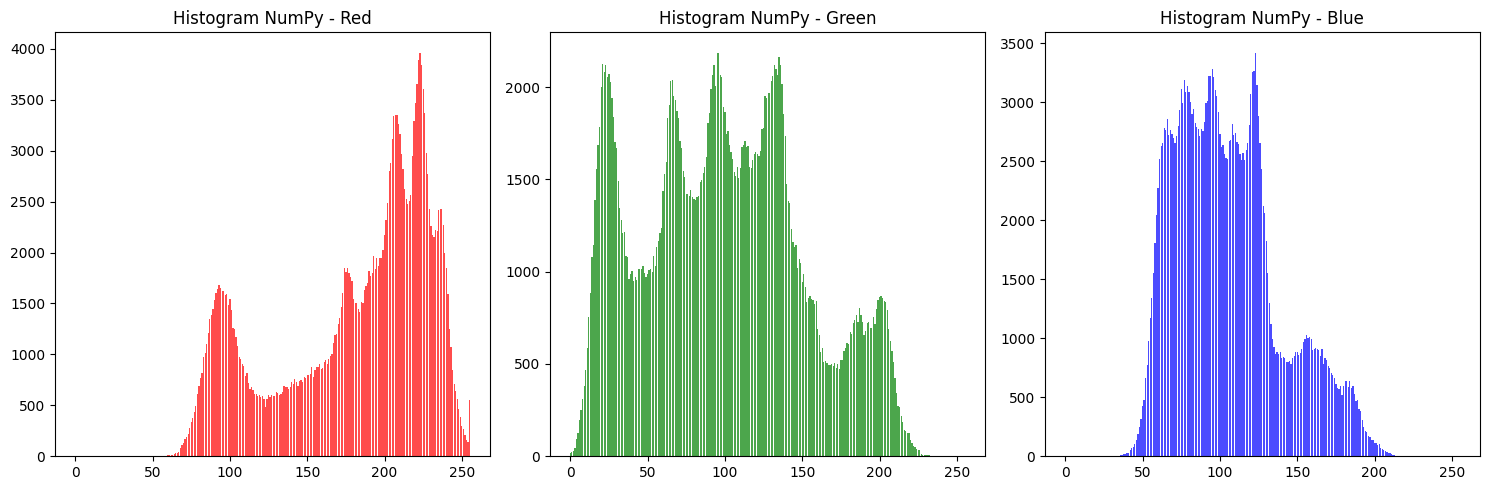

Histogram NumPy sudah dibuat. Bandingkan hasilnya — bentuknya harus sama dengan histogram manual sebelumnya.


In [6]:
# --- Histogram dengan NumPy ---
# Pisahkan channel warna
r_channel = img_rgb[:, :, 0]
g_channel = img_rgb[:, :, 1]
b_channel = img_rgb[:, :, 2]

# Hitung histogram menggunakan numpy
hist_r_np, _ = np.histogram(r_channel.flatten(), bins=256, range=[0,256])
hist_g_np, _ = np.histogram(g_channel.flatten(), bins=256, range=[0,256])
hist_b_np, _ = np.histogram(b_channel.flatten(), bins=256, range=[0,256])

# Plot hasilnya
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.bar(range(256), hist_r_np, color='red', alpha=0.7)
plt.title('Histogram NumPy - Red')

plt.subplot(1, 3, 2)
plt.bar(range(256), hist_g_np, color='green', alpha=0.7)
plt.title('Histogram NumPy - Green')

plt.subplot(1, 3, 3)
plt.bar(range(256), hist_b_np, color='blue', alpha=0.7)
plt.title('Histogram NumPy - Blue')

plt.tight_layout()
plt.show()

print("Histogram NumPy sudah dibuat. Bandingkan hasilnya — bentuknya harus sama dengan histogram manual sebelumnya.")


Langkah 4 — Histogram Equalization Manual (Grayscale)

/tmp/ipython-input-3152458390.py:40: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(orig.flatten(), 256, [0,256], color=c, alpha=0.4, label='Sebelum')
/tmp/ipython-input-3152458390.py:41: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(eq.flatten(), 256, [0,256], color=c, alpha=0.7, label='Sesudah')
/tmp/ipython-input-3152458390.py:47: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


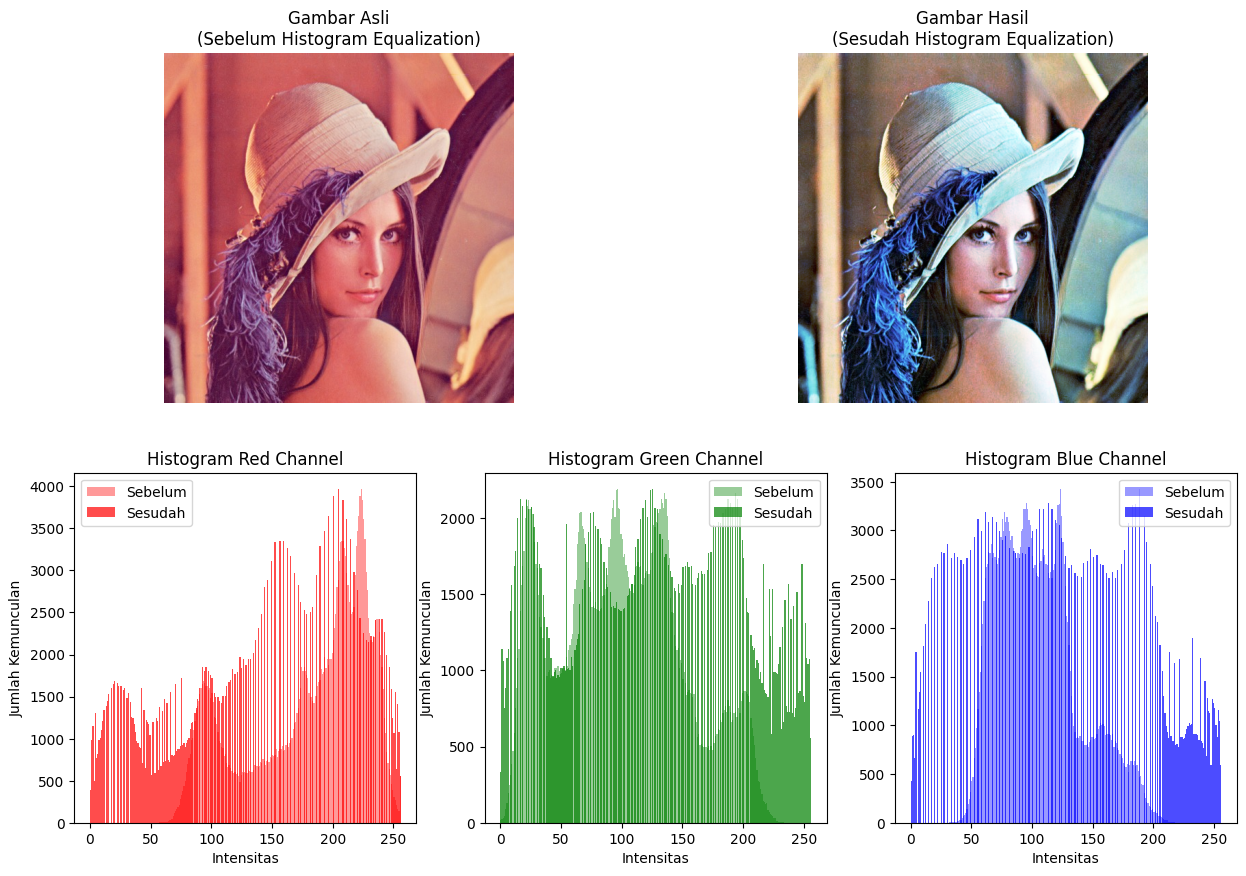

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar berwarna
img_color = cv.imread('/content/lena.jpg')
img_rgb = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)

# Pisahkan channel
r, g, b = cv.split(img_rgb)

# Equalization untuk tiap channel
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

# Gabungkan kembali
img_eq = cv.merge((r_eq, g_eq, b_eq))

# ---- Plot gambar sebelum & sesudah ----
plt.figure(figsize=(15,10))

# Gambar Asli
plt.subplot(2,2,1)
plt.imshow(img_rgb)
plt.title('Gambar Asli\n(Sebelum Histogram Equalization)')
plt.axis('off')

# Gambar Hasil
plt.subplot(2,2,2)
plt.imshow(img_eq)
plt.title('Gambar Hasil\n(Sesudah Histogram Equalization)')
plt.axis('off')

# ---- Histogram RGB ----
# Hitung histogram sebelum & sesudah
colors = ('red', 'green', 'blue')
for i, (orig, eq, c) in enumerate(zip([r,g,b], [r_eq,g_eq,b_eq], colors)):
    plt.subplot(2,3,4+i)
    plt.hist(orig.flatten(), 256, [0,256], color=c, alpha=0.4, label='Sebelum')
    plt.hist(eq.flatten(), 256, [0,256], color=c, alpha=0.7, label='Sesudah')
    plt.title(f'Histogram {c.capitalize()} Channel')
    plt.xlabel('Intensitas')
    plt.ylabel('Jumlah Kemunculan')
    plt.legend()

plt.tight_layout()
plt.show()



Langkah 5 — Perbandingan Equalization Manual vs cv2.equalizeHist()

/tmp/ipython-input-2678038995.py:53: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(ch_manual.flatten(), 256, [0,256], color=c, alpha=0.4, label='Manual')
/tmp/ipython-input-2678038995.py:54: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(ch_cv.flatten(), 256, [0,256], color=c, alpha=0.7, label='cv2.equalizeHist()')
/tmp/ipython-input-2678038995.py:60: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


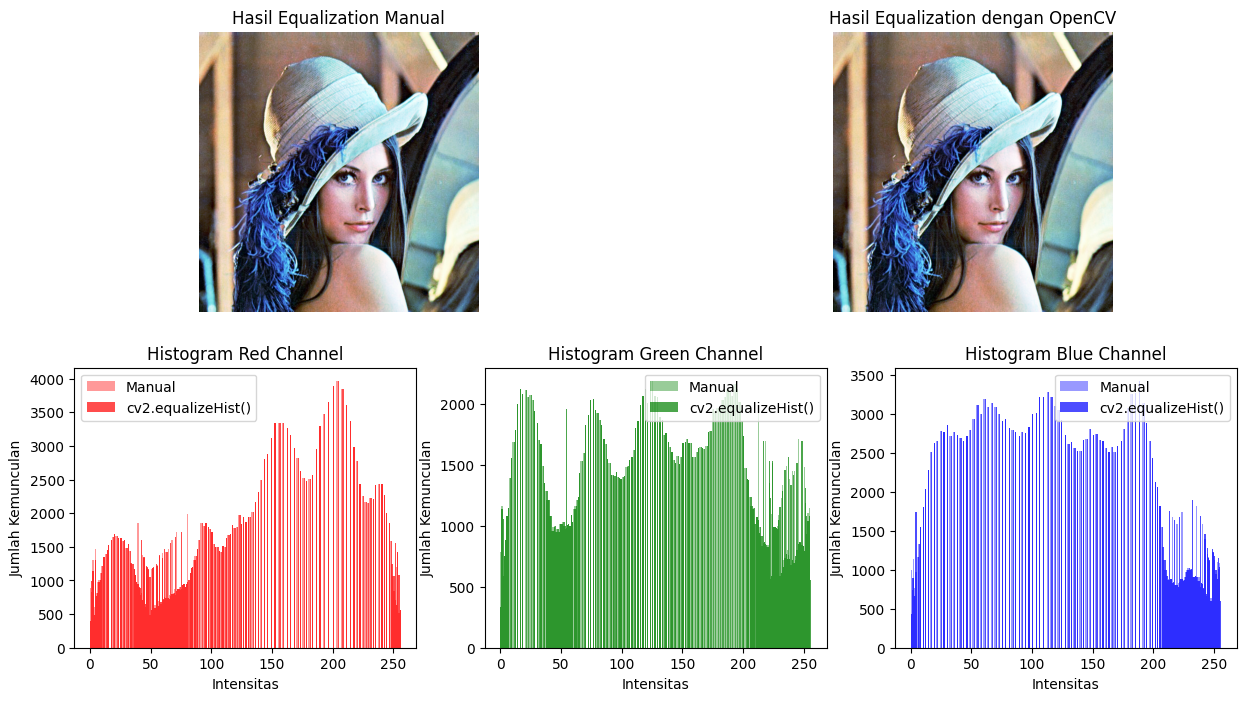

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
img_color = cv.imread('/content/lena.jpg')
img_rgb = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)

# ===== Manual Histogram Equalization (tiap channel) =====
r, g, b = cv.split(img_rgb)

# Buat fungsi equalization manual
def manual_equalization(channel):
    hist, bins = np.histogram(channel.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_masked = np.ma.masked_equal(cdf, 0)
    cdf_masked = (cdf_masked - cdf_masked.min()) * 255 / (cdf_masked.max() - cdf_masked.min())
    cdf_final = np.ma.filled(cdf_masked, 0).astype('uint8')
    return cdf_final[channel]

r_eq_manual = manual_equalization(r)
g_eq_manual = manual_equalization(g)
b_eq_manual = manual_equalization(b)
img_eq_manual = cv.merge((r_eq_manual, g_eq_manual, b_eq_manual))

# ===== OpenCV Equalization =====
r_eq_cv = cv.equalizeHist(r)
g_eq_cv = cv.equalizeHist(g)
b_eq_cv = cv.equalizeHist(b)
img_eq_cv = cv.merge((r_eq_cv, g_eq_cv, b_eq_cv))

# ===== Tampilkan Gambar =====
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.imshow(img_eq_manual)
plt.title('Hasil Equalization Manual')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(img_eq_cv)
plt.title('Hasil Equalization dengan OpenCV')
plt.axis('off')

# ===== Bandingkan Histogram RGB =====
colors = ('red', 'green', 'blue')
for i, (ch_manual, ch_cv, c) in enumerate(zip(
    [r_eq_manual, g_eq_manual, b_eq_manual],
    [r_eq_cv, g_eq_cv, b_eq_cv],
    colors
)):
    plt.subplot(2,3,4+i)
    plt.hist(ch_manual.flatten(), 256, [0,256], color=c, alpha=0.4, label='Manual')
    plt.hist(ch_cv.flatten(), 256, [0,256], color=c, alpha=0.7, label='cv2.equalizeHist()')
    plt.title(f'Histogram {c.capitalize()} Channel')
    plt.xlabel('Intensitas')
    plt.ylabel('Jumlah Kemunculan')
    plt.legend()

plt.tight_layout()
plt.show()


Langkah 6 — Reduksi Warna ke 8 Warna (K-Means Color Quantization)

Memproses pemetaan 16 juta warna ke 8 warna...


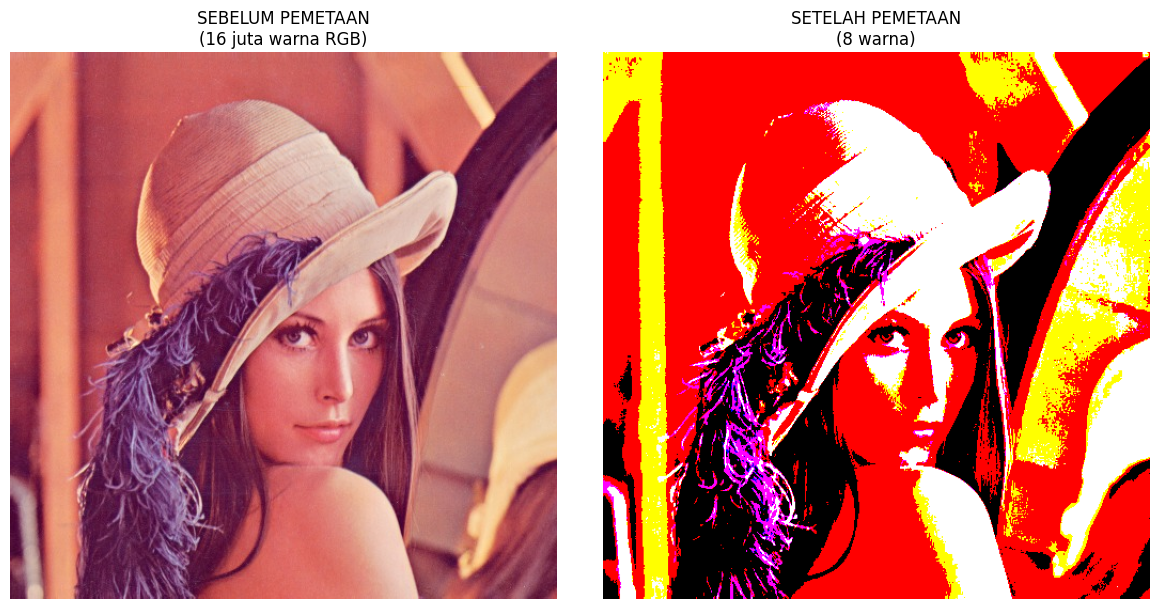

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

print("Memproses pemetaan 16 juta warna ke 8 warna...")

# Baca gambar
img_color = cv.imread('/content/lena.jpg')
img_rgb = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)
img_rgb = np.float32(img_rgb)

# ====== Definisi 8 warna dasar (RGB) ======
colors = np.array([
    [0, 0, 0],        # 0 - Hitam
    [255, 0, 0],      # 1 - Merah
    [255, 255, 0],    # 2 - Kuning
    [0, 255, 0],      # 3 - Hijau
    [0, 255, 255],    # 4 - Cyan
    [0, 0, 255],      # 5 - Biru
    [255, 0, 255],    # 6 - Magenta
    [255, 255, 255]   # 7 - Putih
], dtype=np.float32)

# ====== Fungsi mencari warna terdekat ======
def nearest_color(pixel, palette):
    diff = palette - pixel
    dist = np.sqrt(np.sum(diff**2, axis=1))
    return palette[np.argmin(dist)]

# ====== Pemetaan setiap piksel ======
h, w, _ = img_rgb.shape
img_mapped = np.zeros_like(img_rgb)
for y in range(h):
    for x in range(w):
        img_mapped[y, x] = nearest_color(img_rgb[y, x], colors)

img_mapped = np.uint8(img_mapped)

# ====== Tampilkan hasil ======
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(np.uint8(img_rgb))
plt.title("SEBELUM PEMETAAN\n(16 juta warna RGB)")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_mapped)
plt.title("SETELAH PEMETAAN\n(8 warna)")
plt.axis('off')

plt.tight_layout()
plt.show()



Langkah 7 — Dithering Floyd and Steinberg

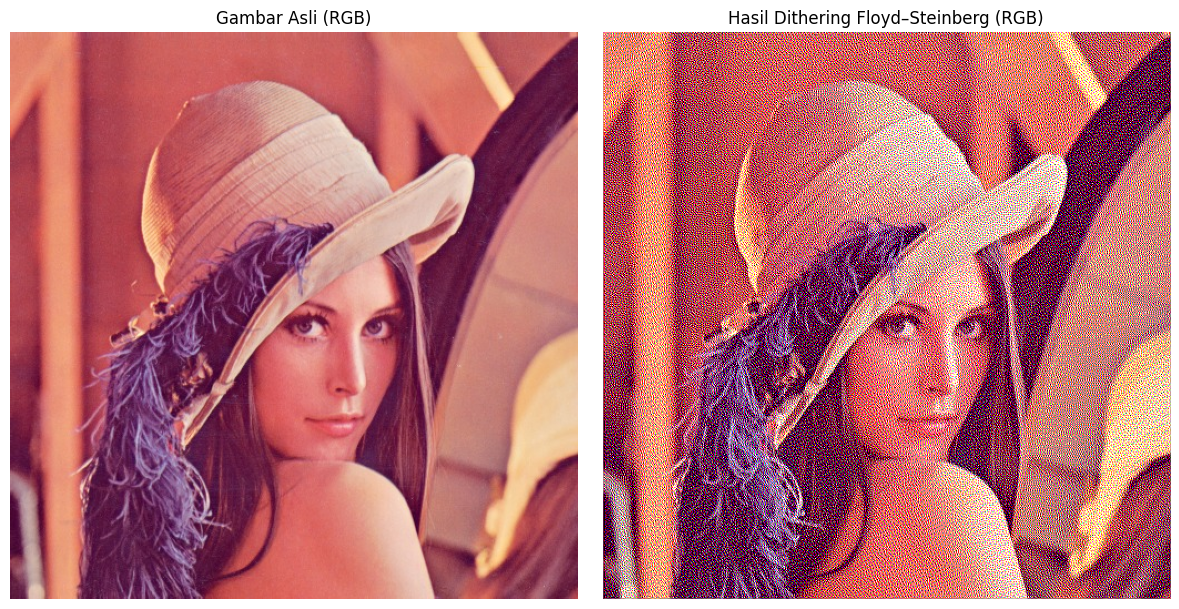

In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# ====== Membaca gambar berwarna ======
img_color = cv.imread('/content/lena.jpg')
img_rgb = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)
img_dither = img_rgb.astype(float)

# ====== Implementasi Dithering Floyd–Steinberg untuk tiap channel ======
h, w, _ = img_dither.shape

for y in range(h - 1):
    for x in range(1, w - 1):
        for c in range(3):  # loop untuk channel R, G, B
            old_pixel = img_dither[y, x, c]
            new_pixel = np.round(old_pixel / 255.0) * 255  # kuantisasi ke 0 atau 255
            img_dither[y, x, c] = new_pixel
            error = old_pixel - new_pixel

            # Sebarkan error ke pixel tetangga (R1–R4)
            img_dither[y,   x+1, c] += (7/16) * error
            img_dither[y+1, x-1, c] += (3/16) * error
            img_dither[y+1, x,   c] += (5/16) * error
            img_dither[y+1, x+1, c] += (1/16) * error

# Batasi nilai agar tetap dalam rentang 0–255
img_dither = np.clip(img_dither, 0, 255).astype(np.uint8)

# ====== Tampilkan hasil ======
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title('Gambar Asli (RGB)')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_dither)
plt.title('Hasil Dithering Floyd–Steinberg (RGB)')
plt.axis('off')

plt.tight_layout()
plt.show()



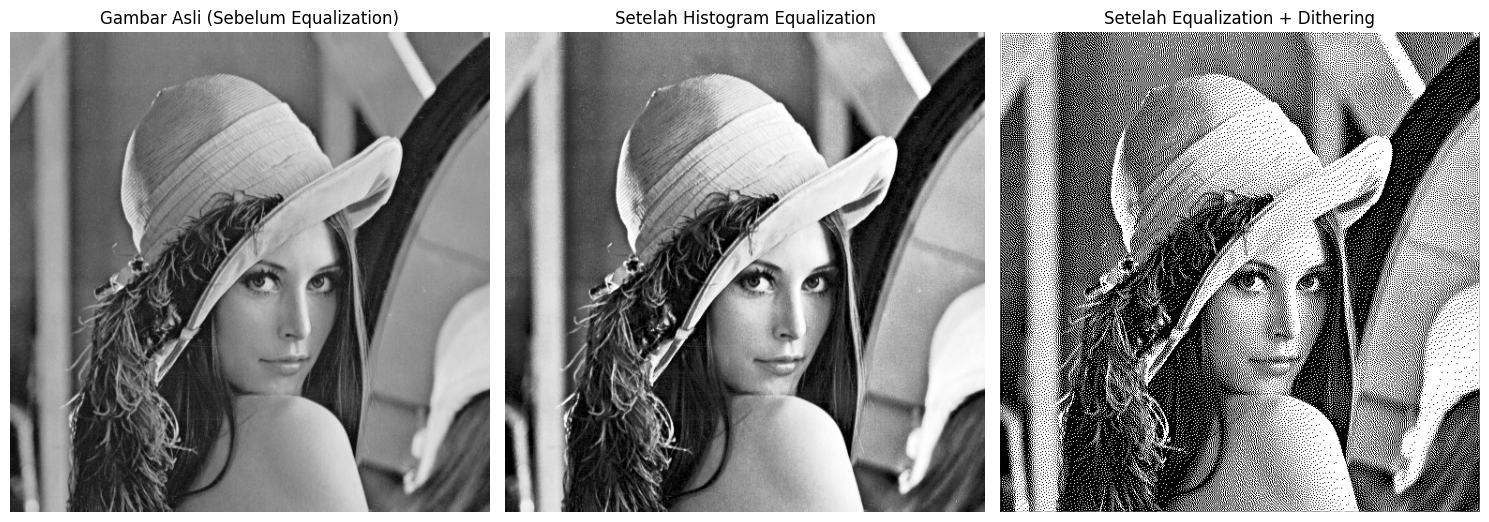

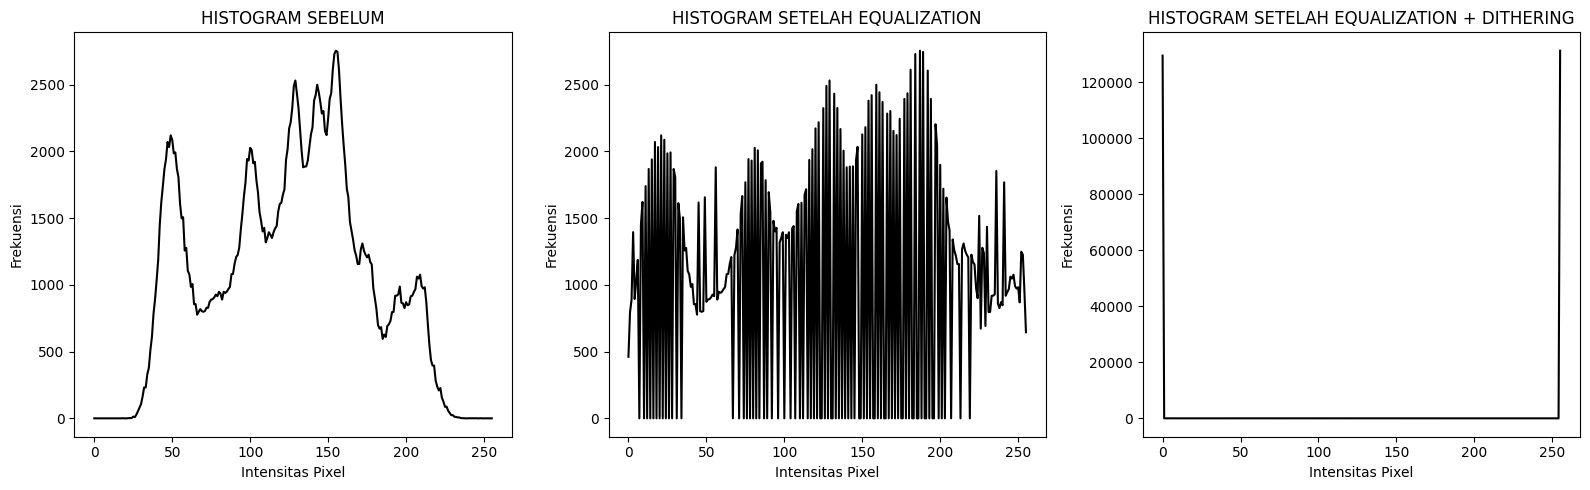

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# ===== 1️ Membaca gambar grayscale =====
img = cv.imread('/content/lena.jpg', cv.IMREAD_GRAYSCALE)

# ===== 2️ Histogram Equalization =====
img_eq = cv.equalizeHist(img)

# ===== 3️ Floyd–Steinberg Dithering =====
def floyd_steinberg_dithering(img):
    img = img.astype(float)
    h, w = img.shape
    for y in range(h - 1):
        for x in range(1, w - 1):
            old_pixel = img[y, x]
            new_pixel = 255 if old_pixel > 127 else 0
            img[y, x] = new_pixel
            error = old_pixel - new_pixel

            # Sebarkan error ke pixel tetangga
            img[y,   x+1] += (7/16) * error
            img[y+1, x-1] += (3/16) * error
            img[y+1, x]   += (5/16) * error
            img[y+1, x+1] += (1/16) * error

    return np.clip(img, 0, 255).astype(np.uint8)

# ===== 4️ Terapkan dithering setelah equalization =====
img_dither_eq = floyd_steinberg_dithering(img_eq)

# ===== 5️ Visualisasi Gambar =====
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Gambar Asli (Sebelum Equalization)')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_eq, cmap='gray')
plt.title('Setelah Histogram Equalization')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_dither_eq, cmap='gray')
plt.title('Setelah Equalization + Dithering')
plt.axis('off')

plt.tight_layout()
plt.show()

# ===== 6️ Hitung dan Tampilkan Histogram =====
hist_before, _ = np.histogram(img.flatten(), 256, [0,256])
hist_eq, _     = np.histogram(img_eq.flatten(), 256, [0,256])
hist_dith, _   = np.histogram(img_dither_eq.flatten(), 256, [0,256])

plt.figure(figsize=(16,5))

# Histogram Sebelum
plt.subplot(1,3,1)
plt.plot(hist_before, color='black')
plt.title('HISTOGRAM SEBELUM')
plt.xlabel('Intensitas Pixel')
plt.ylabel('Frekuensi')

# Histogram Setelah Equalization
plt.subplot(1,3,2)
plt.plot(hist_eq, color='black')
plt.title('HISTOGRAM SETELAH EQUALIZATION')
plt.xlabel('Intensitas Pixel')
plt.ylabel('Frekuensi')

# Histogram Setelah Equalization + Dithering
plt.subplot(1,3,3)
plt.plot(hist_dith, color='black')
plt.title('HISTOGRAM SETELAH EQUALIZATION + DITHERING')
plt.xlabel('Intensitas Pixel')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()



histogram untuk hasil dithering kosong karena citra hasil dithering hanya punya dua nilai intensitas (0 dan 255).
Nilai 0 dan 255 jumlahnya besar sekali, sementara bin histogram default (256 bin dari 0–255) membuatnya tampak “kosong” karena dua puncak ekstrem itu menyempit di sisi kiri dan kanan.

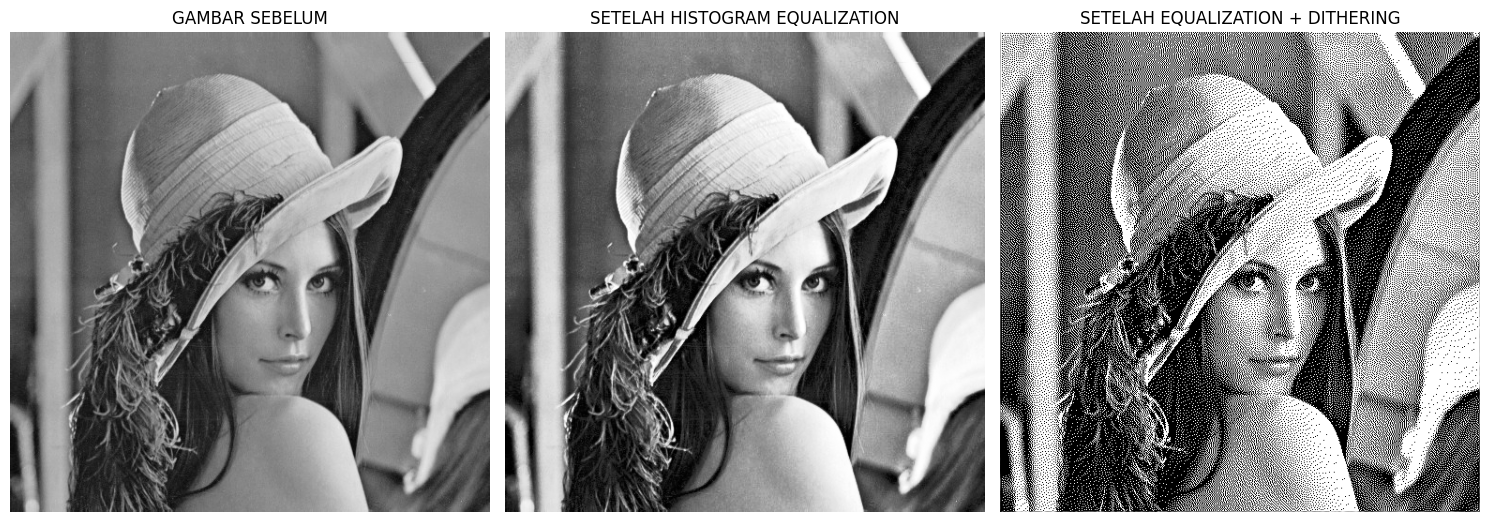

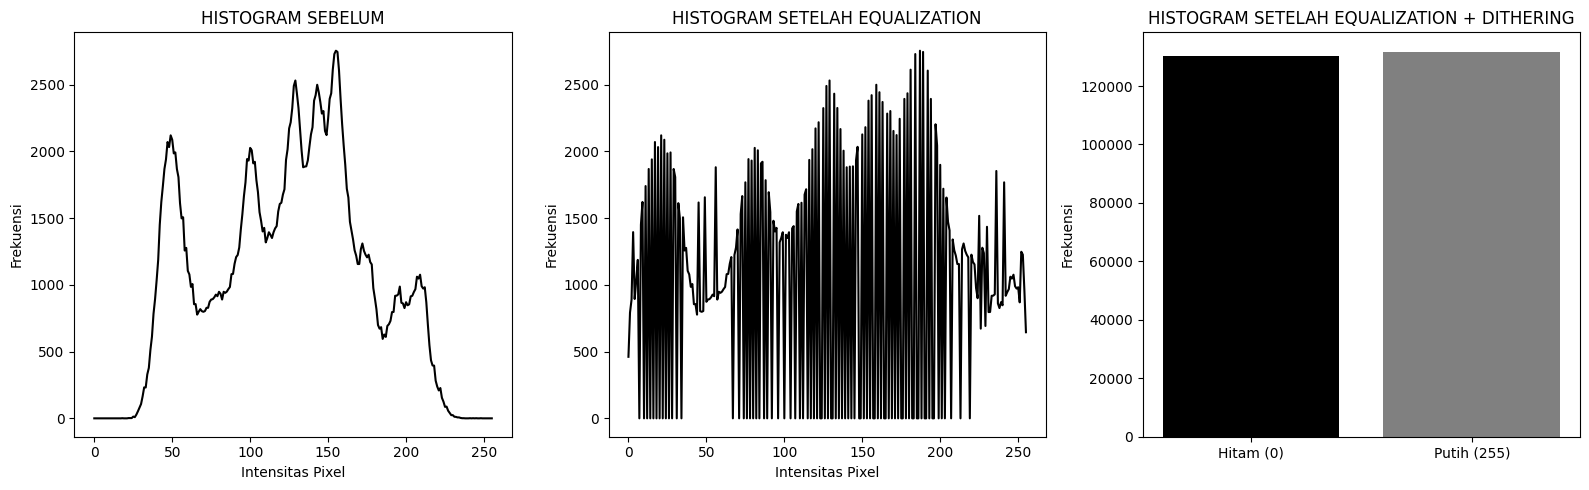

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# ===== 1️ Membaca gambar grayscale =====
img = cv.imread('/content/lena.jpg', cv.IMREAD_GRAYSCALE)

# ===== 2️ Histogram Equalization =====
img_eq = cv.equalizeHist(img)

# ===== 3️ Floyd–Steinberg Dithering =====
def floyd_steinberg_dithering(img):
    img = img.astype(float)
    h, w = img.shape
    for y in range(h - 1):
        for x in range(1, w - 1):
            old_pixel = img[y, x]
            new_pixel = 255 if old_pixel > 127 else 0
            img[y, x] = new_pixel
            error = old_pixel - new_pixel
            # Sebarkan error ke tetangga
            img[y,   x+1] += (7/16) * error
            img[y+1, x-1] += (3/16) * error
            img[y+1, x]   += (5/16) * error
            img[y+1, x+1] += (1/16) * error
    return np.clip(img, 0, 255).astype(np.uint8)

img_dither_eq = floyd_steinberg_dithering(img_eq)

# ===== 4️ Tampilkan gambar =====
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('GAMBAR SEBELUM')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_eq, cmap='gray')
plt.title('SETELAH HISTOGRAM EQUALIZATION')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_dither_eq, cmap='gray')
plt.title('SETELAH EQUALIZATION + DITHERING')
plt.axis('off')

plt.tight_layout()
plt.show()

# ===== 5️ Hitung histogram =====
hist_before, _ = np.histogram(img.flatten(), 256, [0,256])
hist_eq, _ = np.histogram(img_eq.flatten(), 256, [0,256])

# Untuk hasil dithering, hanya 0 dan 255
hist_dith, bins_dith = np.histogram(img_dither_eq.flatten(), bins=[0,128,256])

# ===== 6️ Plot histogram =====
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
plt.plot(hist_before, color='black')
plt.title('HISTOGRAM SEBELUM')
plt.xlabel('Intensitas Pixel')
plt.ylabel('Frekuensi')

plt.subplot(1,3,2)
plt.plot(hist_eq, color='black')
plt.title('HISTOGRAM SETELAH EQUALIZATION')
plt.xlabel('Intensitas Pixel')
plt.ylabel('Frekuensi')

plt.subplot(1,3,3)
plt.bar(['Hitam (0)', 'Putih (255)'], hist_dith, color=['black', 'gray'])
plt.title('HISTOGRAM SETELAH EQUALIZATION + DITHERING')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


ini adalah versi visualisasi yg lain